# Data munging

In [1]:
# imports
import pandas as pd
import numpy as np
import os

In [2]:
# set path of raw data
raw_data_path = os.path.join(os.path.pardir, 'data', 'raw')
train_file_path = os.path.join(raw_data_path, 'train.csv')
test_file_path = os.path.join(raw_data_path, 'test.csv')

# read data  with all deffault parameters
train_df = pd.read_csv(train_file_path, index_col='PassengerId')
test_df = pd.read_csv(test_file_path, index_col='PassengerId')

In [3]:
test_df['Survived'] = -888 # Adding Survived with default value

In [4]:
# Si axis es igual a 1 compinas uno al lado de otro, si 0, anexas uno debajo de otro
df = pd.concat((train_df, test_df), axis=0, sort=True)  

## Missing Values Treatment

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


### Feature Embarked

In [6]:
# Extract rows with Embarked as null
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
62,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,1,female,0,1,113572
830,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1,113572


In [7]:
# How many People embarked at diferent points
df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [8]:
# Wich embarked point has highet survival count
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Embarked )

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


In [9]:
# impute the missing values with 'S'
# df.loc[df.Embarked.isnull(), 'Embarked'] = 'S'
# df.Embarked.fillna('S', inplae=True)  # inplace = False crea una copia del dataframe, pero = True modifica el df actual.

In [10]:
# Option 2:
df.groupby(['Pclass', 'Embarked']).Fare.median().unstack()

Embarked,C,Q,S
Pclass,,,
1,76.7292,90.00,52.000
2,15.3146,12.35,15.375
3,7.8958,7.75,8.050


In [11]:
# Replace the missing values with 'C'
df.Embarked.fillna('S', inplace=True)

In [12]:
df[df.Embarked.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


## Feature: Fare (missing)

In [14]:
df[df.Fare.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,-888,3701


In [15]:
df.groupby(['Pclass']).Fare.mean()

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [16]:
median_fare = df.loc[(df.Pclass == 3) & (df.Embarked == 'S'), 'Fare'].median()
print(median_fare)

8.05


In [17]:
df.Fare.fillna(8.05, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


## Feature Age:

In [19]:
# Verify null rows 
df[df.Age.isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
6,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,3,male,0,0,330877
18,NaN,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,2,male,0,1,244373
20,NaN,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,3,female,0,1,2649
27,NaN,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,3,male,0,0,2631
29,NaN,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,3,female,0,1,330959
...,...,...,...,...,...,...,...,...,...,...,...
1300,NaN,NaN,Q,7.7208,"Riordan, Miss. Johanna Hannah""""",0,3,female,0,-888,334915
1302,NaN,NaN,Q,7.7500,"Naughton, Miss. Hannah",0,3,female,0,-888,365237
1305,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,3,male,0,-888,A.5. 3236


In [20]:
# Set the number of rows to display
pd.options.display.max_rows = 15

### Option 1: replace all null values with mean value

In [21]:
# Explore distribution of Age using histogram
df.Age.plot(kind='hist', bins=20, color='g');

In [22]:
df.Age.mean()

29.881137667304014

In [23]:
## NOte that we have some extreme values (70 - 80) and mean can be easily affected by those values


### Option 2: replace with median Age of gender

In [24]:
# median values:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

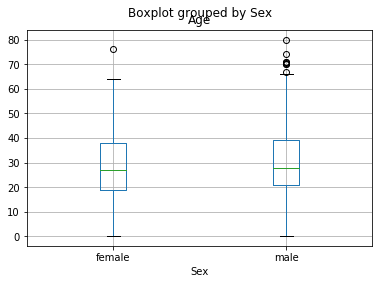

In [25]:
# Visualize using boxplot:
df[df.Age.notnull()].boxplot('Age', 'Sex');

In [26]:
# Replace:
#age_sex_median = df.groupby('Sex').Age.transform('median')
#df.Age.fillna(age_sex_median, inplace=True)

### Option 3: replare with median Age of Pclass

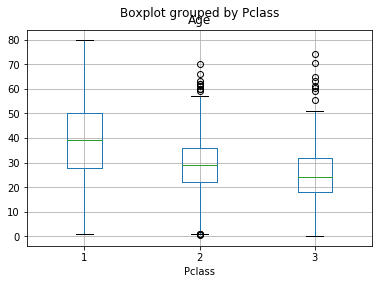

In [27]:
df[df.Age.notnull()].boxplot('Age', 'Pclass');

In [28]:
# Podría ser una buena opcion por tener comportamientos diferentes, ofrecen resultados mas discretos
# Replace:
# Replace:
#pclass_sex_median = df.groupby('Pclass').Age.transform('median')
#df.Age.fillna(pclass_sex_median, inplace=True)

### Option 4: replace with median Age of Title

In [29]:
df.Name

PassengerId
1                                 Braund, Mr. Owen Harris
2       Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                  Heikkinen, Miss. Laina
4            Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                                Allen, Mr. William Henry
                              ...                        
1305                                   Spector, Mr. Woolf
1306                         Oliva y Ocana, Dona. Fermina
1307                         Saether, Mr. Simon Sivertsen
1308                                  Ware, Mr. Frederick
1309                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [30]:
# Function to stract the title from the name
def GetTitle(name):
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title

In [31]:
# Use the map function to apply tha function on each value row i
df.Name.map(lambda x: GetTitle(x))  # Alternatively : df.Name.map(GetTitle)

PassengerId
1           mr
2          mrs
3         miss
4          mrs
5           mr
         ...  
1305        mr
1306      dona
1307        mr
1308        mr
1309    master
Name: Name, Length: 1309, dtype: object

In [32]:
df.Name.map(lambda x: GetTitle(x)).unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'lady', 'sir', 'mlle', 'col', 'capt', 'the countess',
       'jonkheer', 'dona'], dtype=object)

In [33]:
# Function to stract the title from the name
def GetTitle(name):
    title_group = {
        'mr' : 'Mr',
        'mrs': 'Mrs',
        'miss': 'Miss',
        'master': 'Master',
        'don': 'Sir',
        'rev': 'Sir',
        'dr': 'Officer',
        'mme': 'Mrs',
        'ms': 'Mrs',
        'major': 'Officer',
        'lady': 'Lady',
        'sir': 'Sir',
        'mlle': 'Miss',
        'col': 'Officer',
        'capt': 'Officer',
        'the countess': 'Lady',
        'jonkheer': 'Sir',
        'dona': 'Lady'
    }
    first_name_with_title = name.split(',')[1]
    title = first_name_with_title.split('.')[0]
    title = title.strip().lower()
    return title_group[title]

In [34]:
# Create Title feature:
df['Title'] = df.Name.map(lambda x: GetTitle(x))

In [35]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
1,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,0,A/5 21171,Mr
2,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,1,PC 17599,Mrs
3,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,1,STON/O2. 3101282,Miss
4,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,1,113803,Mrs
5,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,0,373450,Mr


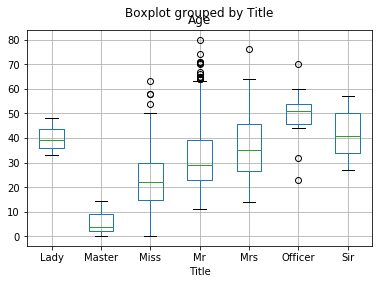

In [36]:
df[df.Age.notnull()].boxplot('Age', 'Title');

In [37]:
title_age_median = df.groupby('Title').Age.transform('median')
df.Age.fillna(title_age_median, inplace=True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


# Working with outlaiers

## Age

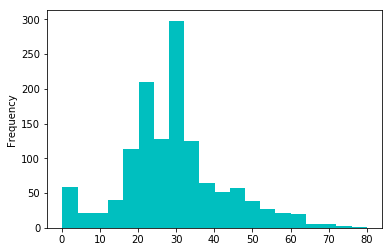

In [39]:
df.Age.plot(kind='hist', color='c', bins=20);

In [40]:
df[df.Age >= 70]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
97,71.0,A5,C,34.6542,"Goldschmidt, Mr. George B",0,1,male,0,0,PC 17754,Mr
117,70.5,NaN,Q,7.7500,"Connors, Mr. Patrick",0,3,male,0,0,370369,Mr
494,71.0,NaN,C,49.5042,"Artagaveytia, Mr. Ramon",0,1,male,0,0,PC 17609,Mr
631,80.0,A23,S,30.0000,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1,27042,Mr
673,70.0,NaN,S,10.5000,"Mitchell, Mr. Henry Michael",0,2,male,0,0,C.A. 24580,Mr
746,70.0,B22,S,71.0000,"Crosby, Capt. Edward Gifford",1,1,male,1,0,WE/P 5735,Officer
852,74.0,NaN,S,7.7750,"Svensson, Mr. Johan",0,3,male,0,0,347060,Mr
988,76.0,C46,S,78.8500,"Cavendish, Mrs. Tyrell William (Julia Florence...",0,1,female,1,-888,19877,Mrs


# Fare

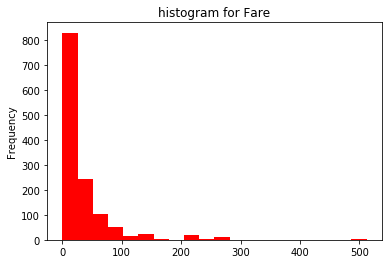

In [41]:
# histogram for fare
df.Fare.plot(kind='hist', color='r', title='histogram for Fare', bins=20);

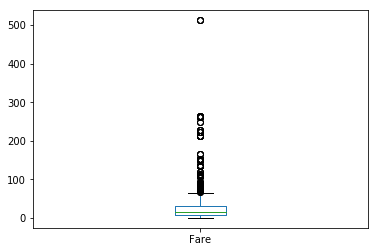

In [42]:
df.Fare.plot(kind='box');

In [43]:
df.loc[df.Fare == df.Fare.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title
PassengerId,,,,,,,,,,,,
259,35.0,NaN,C,512.3292,"Ward, Miss. Anna",0,1,female,0,1,PC 17755,Miss
680,36.0,B51 B53 B55,C,512.3292,"Cardeza, Mr. Thomas Drake Martinez",1,1,male,0,1,PC 17755,Mr
738,35.0,B101,C,512.3292,"Lesurer, Mr. Gustave J",0,1,male,0,1,PC 17755,Mr
1235,58.0,B51 B53 B55,C,512.3292,"Cardeza, Mrs. James Warburton Martinez (Charlo...",1,1,female,0,-888,PC 17755,Mrs


In [44]:
# Try some transformation to reduce the skewness
LogFare = np.log(df.Fare + 1.0)  # Adding 1 to acomodate zero Fare values (log(0) not defined)

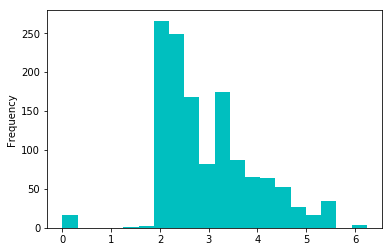

In [45]:
LogFare.plot(kind='hist', color='c', bins=20);

In [46]:
# binning (agruapndo en bloques el dataset)
pd.qcut(df.Fare, 4)

PassengerId
1         (-0.001, 7.896]
2       (31.275, 512.329]
3         (7.896, 14.454]
4       (31.275, 512.329]
5         (7.896, 14.454]
              ...        
1305      (7.896, 14.454]
1306    (31.275, 512.329]
1307      (-0.001, 7.896]
1308      (7.896, 14.454]
1309     (14.454, 31.275]
Name: Fare, Length: 1309, dtype: category
Categories (4, interval[float64]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.275] < (31.275, 512.329]]

In [47]:
pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'hight', 'very_hight']) # Discretization

PassengerId
1         very_low
2       very_hight
3              low
4       very_hight
5              low
           ...    
1305           low
1306    very_hight
1307      very_low
1308           low
1309         hight
Name: Fare, Length: 1309, dtype: category
Categories (4, object): [very_low < low < hight < very_hight]

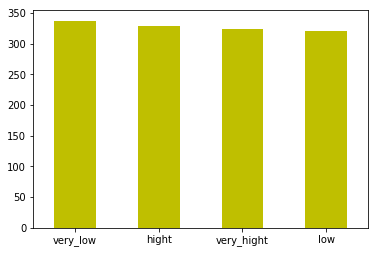

In [48]:
pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'hight', 'very_hight']).value_counts().plot(kind='bar', color='y', rot=0);

In [49]:
df['Fare_Bin'] = pd.qcut(df.Fare, 4, labels=['very_low', 'low', 'hight', 'very_hight']) 

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 13 columns):
Age         1309 non-null float64
Cabin       295 non-null object
Embarked    1309 non-null object
Fare        1309 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null int64
Sex         1309 non-null object
SibSp       1309 non-null int64
Survived    1309 non-null int64
Ticket      1309 non-null object
Title       1309 non-null object
Fare_Bin    1309 non-null category
dtypes: category(1), float64(2), int64(4), object(6)
memory usage: 134.4+ KB


# FEature Engineering

### Feature Age State: (Adult child)

In [51]:
# Age State
df['AgeState'] = np.where(df['Age'] >= 18, 'Adult', 'Child')

In [52]:
# Counts
df.AgeState.value_counts()

Adult    1147
Child     162
Name: AgeState, dtype: int64

In [53]:
# Crosstab
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].AgeState)

AgeState,Adult,Child
Survived,,
0,495,54
1,279,63


## Feature Family Size

In [54]:
# Family: adding PArents with Siblings
df['FamilySize'] = df.Parch + df.SibSp + 1 # 1 for self

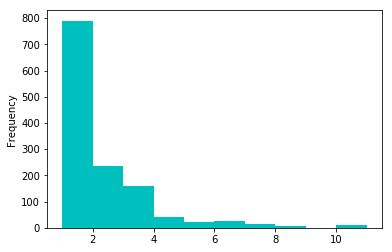

In [55]:
# Explore the family feature
df.FamilySize.plot(kind='hist', color='c');

In [56]:
# Further explore 
df.loc[df.FamilySize == df.FamilySize.max()]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,AgeState,FamilySize
PassengerId,,,,,,,,,,,,,,,
160,4.0,NaN,S,69.55,"Sage, Master. Thomas Henry",2,3,male,8,0,CA. 2343,Master,very_hight,Child,11
181,22.0,NaN,S,69.55,"Sage, Miss. Constance Gladys",2,3,female,8,0,CA. 2343,Miss,very_hight,Adult,11
202,29.0,NaN,S,69.55,"Sage, Mr. Frederick",2,3,male,8,0,CA. 2343,Mr,very_hight,Adult,11
325,29.0,NaN,S,69.55,"Sage, Mr. George John Jr",2,3,male,8,0,CA. 2343,Mr,very_hight,Adult,11
793,22.0,NaN,S,69.55,"Sage, Miss. Stella Anna",2,3,female,8,0,CA. 2343,Miss,very_hight,Adult,11
847,29.0,NaN,S,69.55,"Sage, Mr. Douglas Bullen",2,3,male,8,0,CA. 2343,Mr,very_hight,Adult,11
864,22.0,NaN,S,69.55,"Sage, Miss. Dorothy Edith ""Dolly""",2,3,female,8,0,CA. 2343,Miss,very_hight,Adult,11
1080,22.0,NaN,S,69.55,"Sage, Miss. Ada",2,3,female,8,-888,CA. 2343,Miss,very_hight,Adult,11
1234,29.0,NaN,S,69.55,"Sage, Mr. John George",9,3,male,1,-888,CA. 2343,Mr,very_hight,Adult,11


In [57]:
# Crosstab
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].FamilySize)

FamilySize,1,2,3,4,5,6,7,8,11
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


# FEature IsMother

In [58]:
# a lady aged more than 18 who has PArch > 0 and is married (not Miss)
df['IsMother'] = np.where(((df.Age > 18) & (df.Sex == 'female') & (df.Title != 'Miss') & (df.Parch > 0)), 1, 0)

In [59]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].IsMother)

IsMother,0,1
Survived,,
0,533,16
1,303,39


# Deck

In [60]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [61]:
# Explore PAssengers in cabin T
df.loc[df.Cabin == 'T']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Title,Fare_Bin,AgeState,FamilySize,IsMother
PassengerId,,,,,,,,,,,,,,,,
340,45.0,T,S,35.5,"Blackwell, Mr. Stephen Weart",0,1,male,0,0,113784,Mr,very_hight,Adult,1,0


In [62]:
# Is weird so we asume that this is an error value, so we set this value to Nan
df.loc[df.Cabin == 'T', 'Cabin'] = np.NaN

In [63]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34',
       'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37',
       'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39',
       'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41',
       'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64', 'E24

In [64]:
def get_deck(cabin):
    return np.where(pd.notnull(cabin), str(cabin)[0].upper(), 'Z')

df['Deck'] = df['Cabin'].map(lambda x: get_deck(x))

In [65]:
df.Deck.value_counts()

Z    1015
C      94
B      65
D      46
E      41
A      22
F      21
G       5
Name: Deck, dtype: int64

In [66]:
pd.crosstab(df[df.Survived != -888].Survived, df[df.Survived != -888].Deck)

Deck,A,B,C,D,E,F,G,Z
Survived,,,,,,,,
0,8,12,24,8,8,5,2,482
1,7,35,35,25,24,8,2,206


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 17 columns):
Age           1309 non-null float64
Cabin         294 non-null object
Embarked      1309 non-null object
Fare          1309 non-null float64
Name          1309 non-null object
Parch         1309 non-null int64
Pclass        1309 non-null int64
Sex           1309 non-null object
SibSp         1309 non-null int64
Survived      1309 non-null int64
Ticket        1309 non-null object
Title         1309 non-null object
Fare_Bin      1309 non-null category
AgeState      1309 non-null object
FamilySize    1309 non-null int64
IsMother      1309 non-null int32
Deck          1309 non-null object
dtypes: category(1), float64(2), int32(1), int64(5), object(8)
memory usage: 170.2+ KB


# Categorical Feature Encoding

In [68]:
# Sex
df['IsMale'] = np.where(df.Sex == 'male', 1, 0)

In [69]:
# One Hot encoding!!!!!
df = pd.get_dummies(df, columns=['Deck', 'Pclass', 'Title', 'Fare_Bin', 'Embarked', 'AgeState'])  

In [70]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 39 columns):
Age                    1309 non-null float64
Cabin                  294 non-null object
Fare                   1309 non-null float64
Name                   1309 non-null object
Parch                  1309 non-null int64
Sex                    1309 non-null object
SibSp                  1309 non-null int64
Survived               1309 non-null int64
Ticket                 1309 non-null object
FamilySize             1309 non-null int64
IsMother               1309 non-null int32
IsMale                 1309 non-null int32
Deck_A                 1309 non-null uint8
Deck_B                 1309 non-null uint8
Deck_C                 1309 non-null uint8
Deck_D                 1309 non-null uint8
Deck_E                 1309 non-null uint8
Deck_F                 1309 non-null uint8
Deck_G                 1309 non-null uint8
Deck_Z                 1309 non-null uint8
Pclass_1               130

In [71]:
df.head()

,Age,Cabin,Fare,Name,Parch,Sex,SibSp,Survived,Ticket,FamilySize,...,Title_Sir,Fare_Bin_very_low,Fare_Bin_low,Fare_Bin_hight,Fare_Bin_very_hight,Embarked_C,Embarked_Q,Embarked_S,AgeState_Adult,AgeState_Child
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.0,NaN,7.2500,"Braund, Mr. Owen Harris",0,male,1,0,A/5 21171,2,...,0,1,0,0,0,0,0,1,1,0
2,38.0,C85,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,female,1,1,PC 17599,2,...,0,0,0,0,1,1,0,0,1,0
3,26.0,NaN,7.9250,"Heikkinen, Miss. Laina",0,female,0,1,STON/O2. 3101282,1,...,0,0,1,0,0,0,0,1,1,0
4,35.0,C123,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,female,1,1,113803,2,...,0,0,0,0,1,0,0,1,1,0
5,35.0,NaN,8.0500,"Allen, Mr. William Henry",0,male,0,0,373450,1,...,0,0,1,0,0,0,0,1,1,0


# Drop and Reorder 

In [72]:
# drop columns
df.drop(['Cabin', 'Name', 'Ticket', 'Parch', 'SibSp', 'Sex'], axis=1, inplace=True)

In [73]:
# reorder Columns 
columns = [column for column in df.columns if column != 'Survived']
columns = ['Survived'] + columns
df = df[columns]

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 33 columns):
Survived               1309 non-null int64
Age                    1309 non-null float64
Fare                   1309 non-null float64
FamilySize             1309 non-null int64
IsMother               1309 non-null int32
IsMale                 1309 non-null int32
Deck_A                 1309 non-null uint8
Deck_B                 1309 non-null uint8
Deck_C                 1309 non-null uint8
Deck_D                 1309 non-null uint8
Deck_E                 1309 non-null uint8
Deck_F                 1309 non-null uint8
Deck_G                 1309 non-null uint8
Deck_Z                 1309 non-null uint8
Pclass_1               1309 non-null uint8
Pclass_2               1309 non-null uint8
Pclass_3               1309 non-null uint8
Title_Lady             1309 non-null uint8
Title_Master           1309 non-null uint8
Title_Miss             1309 non-null uint8
Title_Mr               1309 n

# Save Processed Dataset:

In [75]:
processed_data_path = os.path.join(os.path.pardir, 'data', 'processed')
write_train_data = os.path.join(processed_data_path, 'train.csv')
write_test_data = os.path.join(processed_data_path, 'test.csv')

In [77]:
# train data
df.loc[df.Survived != -888].to_csv(write_train_data)
# Test data
columns = [column for column in columns if column != 'Supervised']
df.loc[df.Survived == -888, columns].to_csv(write_test_data)

# Data Visualization

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 80.,  62., 324., 426., 189., 108.,  66.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

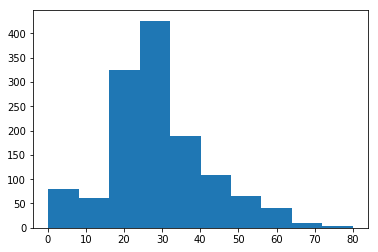

In [79]:
plt.hist(df.Age)

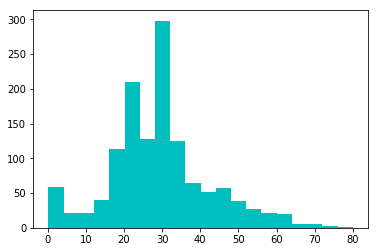

In [81]:
plt.hist(df.Age, bins=20, color='c')
plt.show()

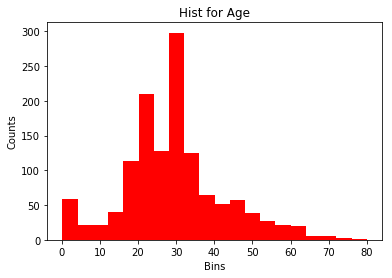

In [82]:
plt.hist(df.Age, bins=20, color='r')
plt.title('Hist for Age')
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.show()

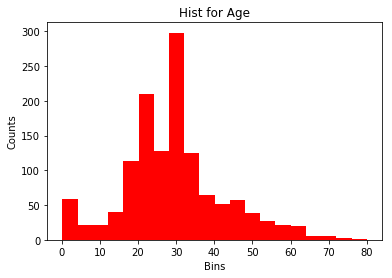

In [84]:
f, ax = plt.subplots()
ax.hist(df.Age, bins=20, color='r')
ax.set_title('Hist for Age')
ax.set_xlabel('Bins')
ax.set_ylabel('Counts')
plt.show()

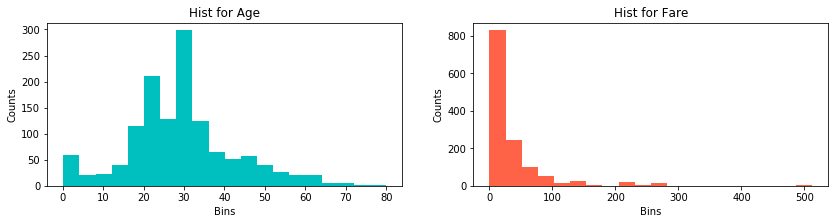

In [85]:
# Add subplots
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,3))

ax1.hist(df.Age, bins=20, color='c')
ax1.set_title('Hist for Age')
ax1.set_xlabel('Bins')
ax1.set_ylabel('Counts')


ax2.hist(df.Fare, bins=20, color='tomato')
ax2.set_title('Hist for Fare')
ax2.set_xlabel('Bins')
ax2.set_ylabel('Counts')
plt.show()

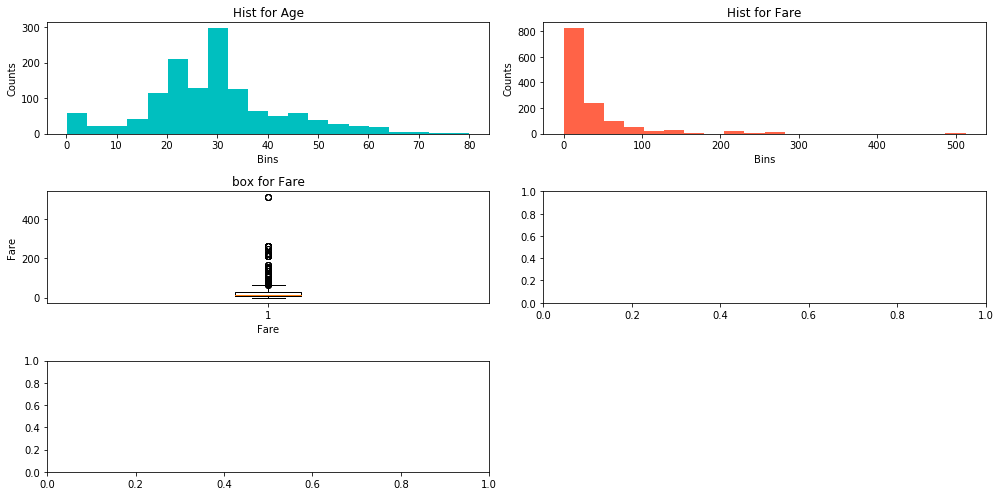

In [91]:
# Adding subplots
f, ax_arr = plt.subplots(3, 2, figsize=(14, 7))
# Plot 1

ax_arr[0,0].hist(df.Age, bins=20, color='c')
ax_arr[0,0].set_title('Hist for Age')
ax_arr[0,0].set_xlabel('Bins')
ax_arr[0,0].set_ylabel('Counts')


ax_arr[0,1].hist(df.Fare, bins=20, color='tomato')
ax_arr[0,1].set_title('Hist for Fare')
ax_arr[0,1].set_xlabel('Bins')
ax_arr[0,1].set_ylabel('Counts')

ax_arr[1,0].boxplot(df.Fare.values)
ax_arr[1,0].set_title('box for Fare')
ax_arr[1,0].set_xlabel('Fare')
ax_arr[1,0].set_ylabel('Fare')

ax_arr[2, 1].axis('off')

plt.tight_layout()
plt.show()